<a href="https://colab.research.google.com/github/CHARUNDYAS/Sales-Prediction-ML-project/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection & Analysis

In [3]:
#loading the dataset from csv file to a Pandas DataFrame
bigmart_data = pd.read_csv('/content/Train.csv')

In [4]:
#first 5 rows of the dataframe
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#number of data points & number of features
bigmart_data.shape

(8523, 12)

In [5]:
#getting some information about the dataset
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type   
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type

Numerical Features:

*   Item_Weight
*   Item_Visibility
*   Item_MRP   
*   Outlet_Establishment_Year
















In [6]:
#checking for missing values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

Mean --> average value

Mode --> most repeated value


In [7]:
#mean value of "Item_Weight" column
bigmart_data['Item_Weight'].mean() 

12.857645184135976

In [8]:
#filling the missing values in "Item_Weight" column with "Mean" value
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace = True)

In [9]:
#checking for missing values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlet_Size" with mode

In [10]:
mode_of_outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = bigmart_data['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
bigmart_data.loc[missing_values, 'Outlet_Size'] = bigmart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [15]:
#checking for missing values
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [16]:
# statistical measures about the data
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [17]:
sns.set()

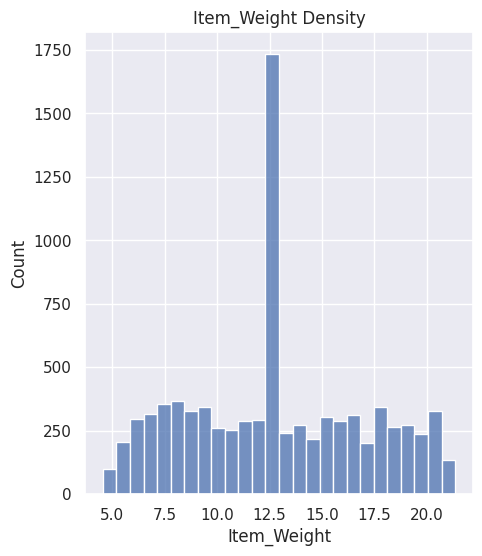

In [18]:
# Item_Weight distribution
plt.figure(figsize=(5,6))
sns.histplot(bigmart_data['Item_Weight'])
plt.title('Item_Weight Density')
plt.show()

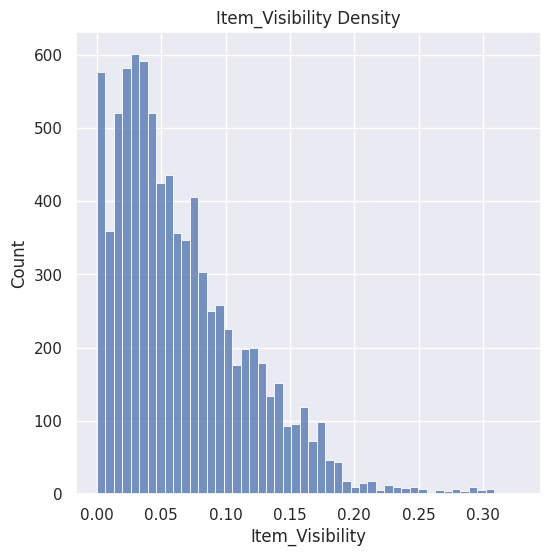

In [19]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(bigmart_data['Item_Visibility'])
plt.title('Item_Visibility Density')
plt.show()

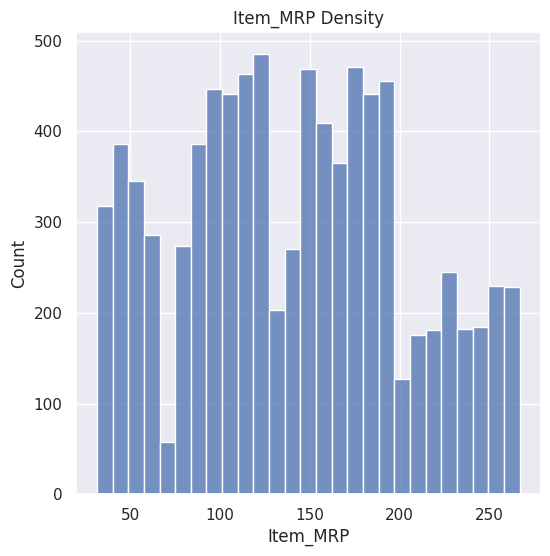

In [20]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(bigmart_data['Item_MRP'])
plt.title('Item_MRP Density')
plt.show()

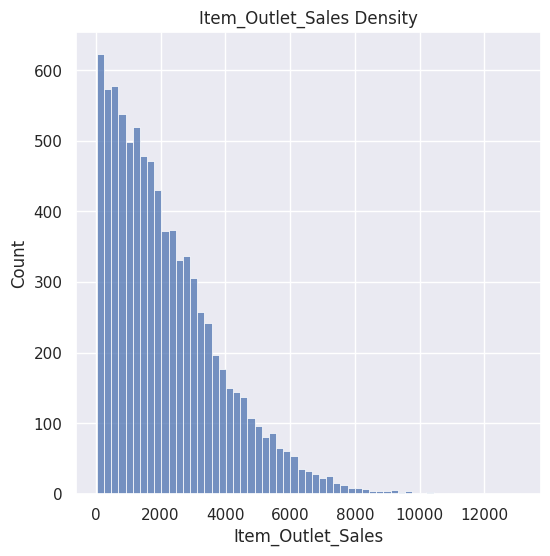

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(bigmart_data['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales Density')
plt.show()

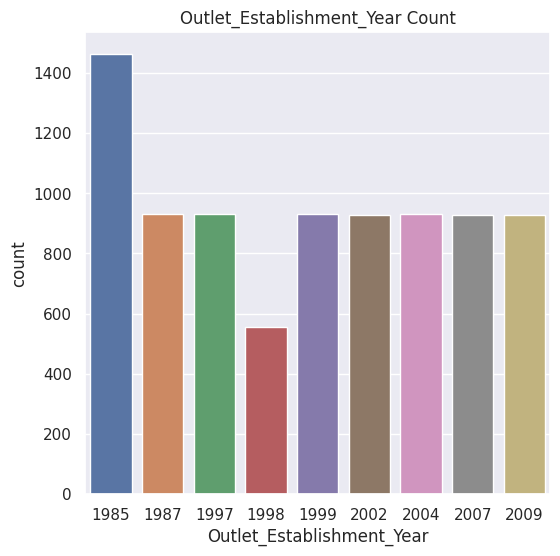

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart_data)
plt.title('Outlet_Establishment_Year Count')
plt.show()

Categorical Features

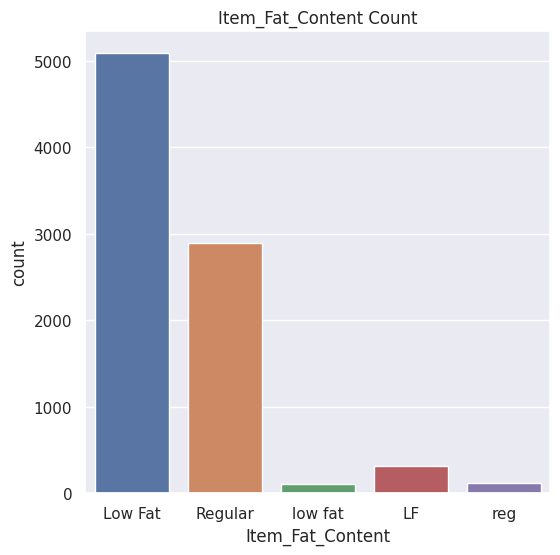

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bigmart_data)
plt.title('Item_Fat_Content Count')
plt.show()

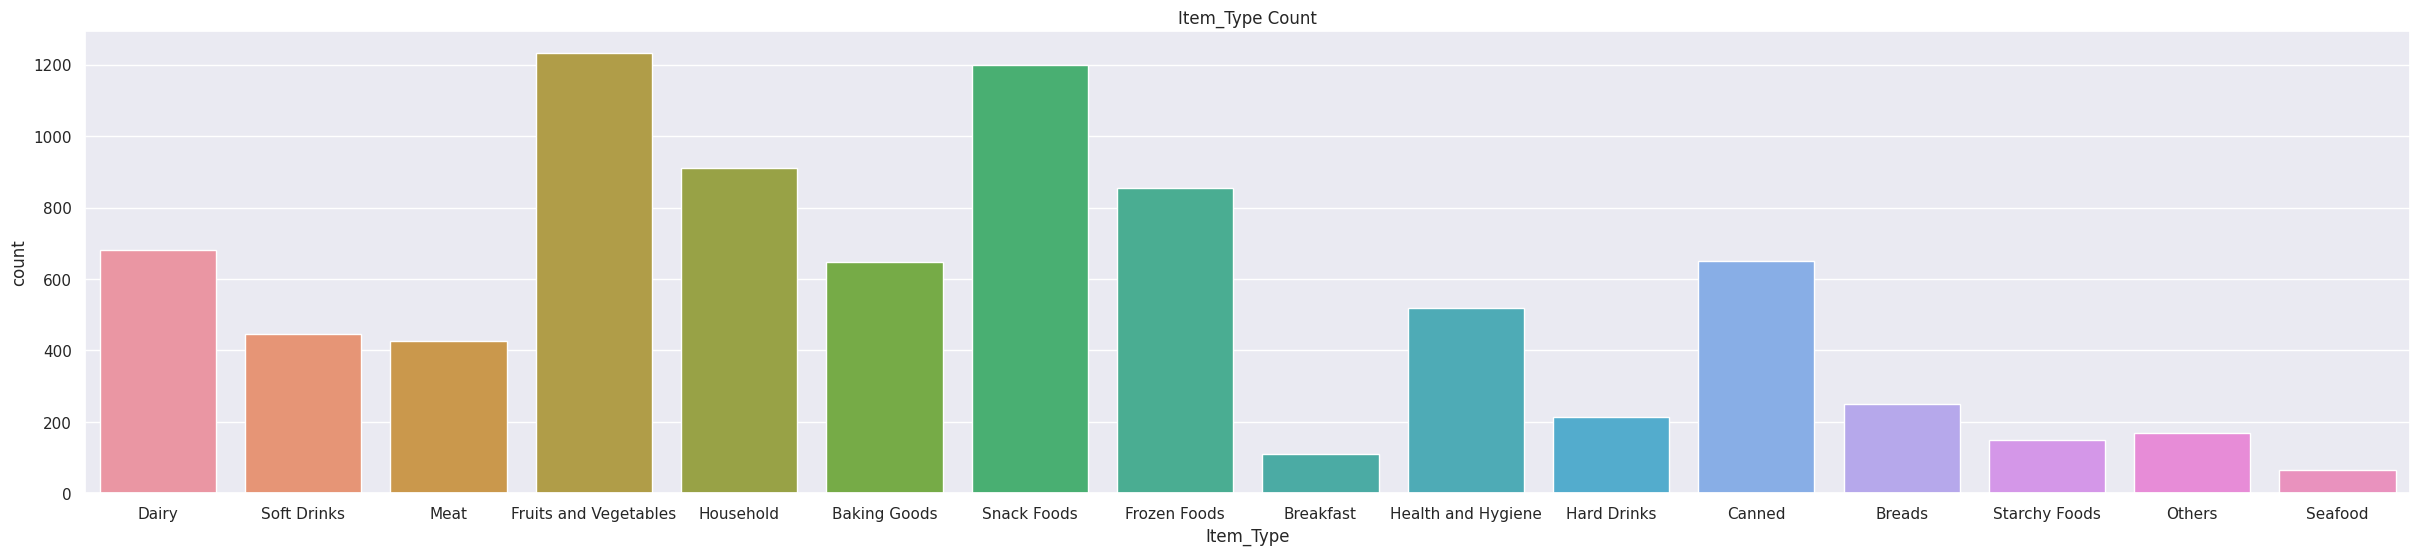

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=bigmart_data)
plt.title('Item_Type Count')
plt.show()

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=bigmart_data)
plt.title('Outlet_Size Count')
plt.show()

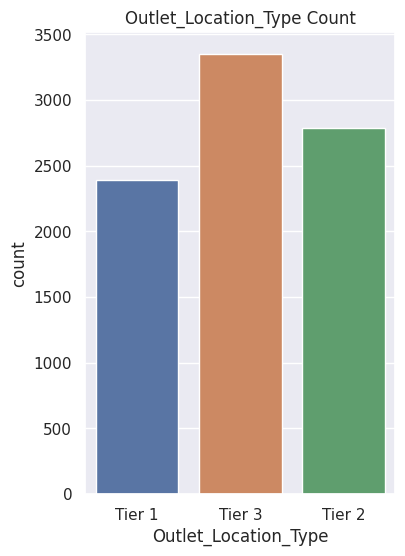

In [26]:
# Outlet_Location_Type column
plt.figure(figsize=(4,6))
sns.countplot(x='Outlet_Location_Type', data=bigmart_data)
plt.title('Outlet_Location_Type Count')
plt.show()

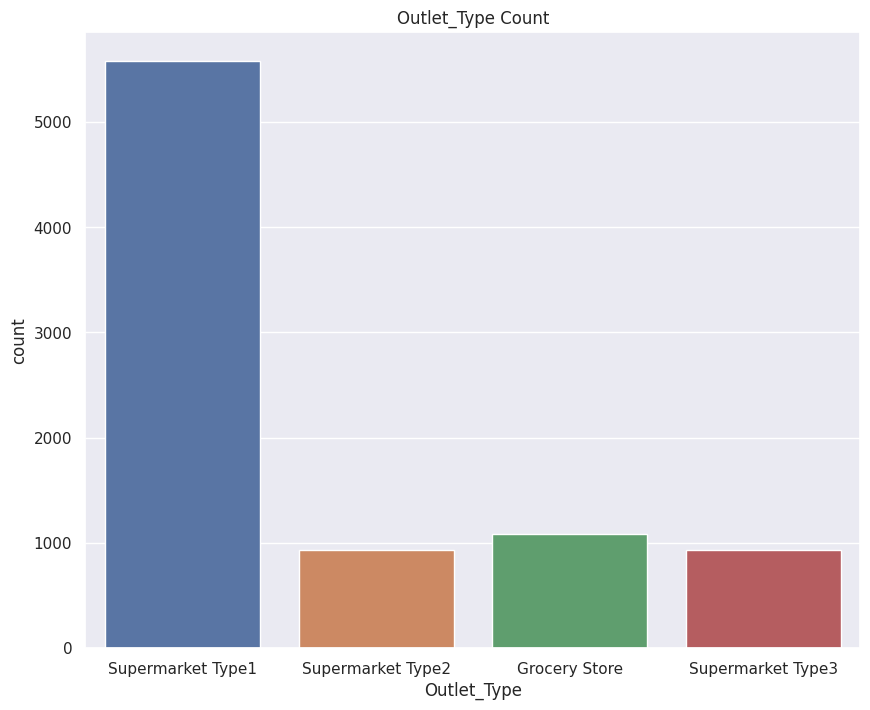

In [27]:
# Outlet_Type column
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Type', data=bigmart_data)
plt.title('Outlet_Type Count')
plt.show()

Data Pre-processing

In [28]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
 bigmart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [31]:
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [32]:
 category_encoder = LabelEncoder()

In [33]:
bigmart_data['Item_Identifier'] = category_encoder.fit_transform(bigmart_data['Item_Fat_Content'])
bigmart_data['Item_Fat_Content'] = category_encoder.fit_transform(bigmart_data['Item_Fat_Content'])
bigmart_data['Item_Type'] = category_encoder.fit_transform(bigmart_data['Item_Type'])
bigmart_data['Outlet_Identifier'] = category_encoder.fit_transform(bigmart_data['Outlet_Identifier'])
#bigmart_data['Outlet_Sizes'] = category_encoder.fit_transform(bigmart_data['Outlet_Sizes'])
bigmart_data['Outlet_Location_Type'] = category_encoder.fit_transform(bigmart_data['Outlet_Location_Type'])
bigmart_data['Outlet_Type'] = category_encoder.fit_transform(bigmart_data['Outlet_Type'])

In [34]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,1,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,0,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,0,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


Splitting features and Target
(all the columns without Item_Outlet_Sales are features, Item_Outlet_Sales is the target)

In [35]:
x = bigmart_data.drop(columns='Item_Outlet_Sales', axis=1)
y = bigmart_data['Item_Outlet_Sales']

In [36]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                   0        9.300                 0         0.016047   
1                   1        5.920                 1         0.019278   
2                   0       17.500                 0         0.016760   
3                   1       19.200                 1         0.000000   
4                   0        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518                0        6.865                 0         0.056783   
8519                1        8.380                 1         0.046982   
8520                0       10.600                 0         0.035186   
8521                1        7.210                 1         0.145221   
8522                0       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [37]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting data into Training data & Testing data

In [38]:
x_traindata, x_testdata, y_traindata, y_testdata = train_test_split(x, y, test_size=0.2, random_state=2)

In [39]:
print(x.shape, x_traindata.shape, x_testdata.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [40]:
data_regressor = XGBRegressor()

In [ ]:
data_regressor.fit(x_traindata, y_traindata)

Evaluation

In [ ]:
#prediction on training data
trainingdata_prediction = data_regressor.predict(x_traindata)

In [ ]:
# R squared Value
r2_traindata = metrics.r2_score(y_traindata, trainingdata_prediction)

In [ ]:
print('R squared value = ', r2_traindata)

R squared value depeneds on data set, but in general it is less bad performance if it is high it is good performance

In [ ]:
#prediction on testing data
testingdata_prediction = data_regressor.predict(x_testdata)

In [ ]:
# R squared Value
r2_testdata = metrics.r2_score(y_testdata, testingdata_prediction)

In [ ]:
print('R squared value = ', r2_testdata)